# Лабораторная работа №1. Численное дифференцирование

## 1. Исходные данные

Нужно исследовать абсолютную погрешность численного дифференцирования  
для следующих функций:

1. $f_1(x) = \sin(x^2)$  
2. $f_2(x) = \cos(\sin x)$  
3. $f_3(x) = \exp(\sin(\cos x))$  
4. $f_4(x) = \ln(x+3)$  
5. $f_5(x) = (x+3)^{0.5}$  

Шаг дифференцирования задаётся формулой  

$$
h_n = \frac{2}{2^n}, \qquad n = 1, 2, \dots, 21 .
$$

Для каждого метода и каждой функции нужно построить график абсолютной погрешности
в зависимости от шага $h_n$.

- использовать логарифмический масштаб **по обеим осям**;
- для каждой функции строить графики в отдельном окне;
- сравнить результаты с аналитическими производными.

---

## 2. Точные производные

1. $f_1'(x) = (\sin(x^2))' = 2x\cos(x^2)$  
2. $f_2'(x) = (\cos(\sin x))' = -\sin(\sin x)\,\cos x$  
3. $f_3'(x) = (\exp(\sin(\cos x)))' = -e^{\sin(\cos x)}\cos(\cos x)\,\sin x$  
4. $f_4'(x) = (\ln(x+3))' = \dfrac{1}{x+3}$  
5. $f_5'(x) = ((x+3)^{0.5})' = \dfrac{1}{2\sqrt{x+3}}$  

---

## 3. Формулы численного дифференцирования

Обозначим приближённую производную через $D_h f(x)$.

$$
D_h^{(1)} f(x) = \frac{f(x+h) - f(x)}{h}.
$$


$$
D_h^{(2)} f(x) = \frac{f(x) - f(x-h)}{h}.
$$


$$
D_h^{(3)} f(x) = \frac{f(x+h) - f(x-h)}{2h}.
$$


$$
D_h^{(4)} f(x)
= \frac{4}{3}\,\frac{f(x+h)-f(x-h)}{2h}
- \frac{1}{3}\,\frac{f(x+2h)-f(x-2h)}{4h}.
$$


$$
D_h^{(5)} f(x)
= \frac{3}{2}\,\frac{f(x+h)-f(x-h)}{2h}
- \frac{3}{5}\,\frac{f(x+2h)-f(x-2h)}{4h}
+ \frac{1}{10}\,\frac{f(x+3h)-f(x-3h)}{6h}.
$$

---

## 4. Абсолютная погрешность

Для каждого метода и каждого значения шага $h_n$ рассчитать

$$
\varepsilon(h_n) = \bigl| f'(x) - D_{h_n} f(x) \bigr|
$$

и построить графики зависимости $\varepsilon(h_n)$ от $h_n$ в логарифмическом масштабе.


In [1]:
# точка, в которой выполняется дифференцирование
x0 = 10.0

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from dataclasses import dataclass

@dataclass
class TestFunction:
    """Функция и её аналитическая производная."""
    f: callable
    df: callable
    label: str

@dataclass
class DiffScheme:
    """Численная схема дифференцирования."""
    name: str
    tex: str
    formula: callable

In [4]:
# исходные функции и их производные

def f1(x):
    return np.sin(x**2)

def df1(x):
    return 2 * x * np.cos(x**2)


def f2(x):
    return np.cos(np.sin(x))

def df2(x):
    return -np.sin(np.sin(x)) * np.cos(x)


def f3(x):
    return np.exp(np.sin(np.cos(x)))

def df3(x):
    # (exp(sin(cos x)))' = -exp(sin(cos x)) * cos(cos x) * sin x
    return -np.exp(np.sin(np.cos(x))) * np.cos(np.cos(x)) * np.sin(x)


def f4(x):
    return np.log(x + 3)

def df4(x):
    return 1.0 / (x + 3)


def f5(x):
    return np.sqrt(x + 3)

def df5(x):
    return 1.0 / (2 * np.sqrt(x + 3))


functions = [
    TestFunction(f1, df1, r"$\sin(x^2)$"),
    TestFunction(f2, df2, r"$\cos(\sin x)$"),
    TestFunction(f3, df3, r"$\exp(\sin(\cos x))$"),
    TestFunction(f4, df4, r"$\ln(x+3)$"),
    TestFunction(f5, df5, r"$(x+3)^{0.5}$"),
]


In [5]:
# численные схемы дифференцирования

# 1) прямая разность
def forward_diff(f, x, h):
    return (f(x + h) - f(x)) / h

# 2) обратная разность
def backward_diff(f, x, h):
    return (f(x) - f(x - h)) / h

# 3) центральная разность
def central_diff(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

# 4) комбинация шагов h и 2h
def richardson_2(f, x, h):
    term1 = (f(x + h) - f(x - h)) / (2 * h)
    term2 = (f(x + 2*h) - f(x - 2*h)) / (4 * h)
    return (4/3) * term1 - (1/3) * term2

# 5) комбинация шагов h, 2h и 3h
def richardson_3(f, x, h):
    term1 = (f(x + h) - f(x - h)) / (2 * h)
    term2 = (f(x + 2*h) - f(x - 2*h)) / (4 * h)
    term3 = (f(x + 3*h) - f(x - 3*h)) / (6 * h)
    return (3/2) * term1 - (3/5) * term2 + (1/10) * term3


schemes = [
    DiffScheme("forward",
               r"$\dfrac{f(x+h)-f(x)}{h}$",
               forward_diff),

    DiffScheme("backward",
               r"$\dfrac{f(x)-f(x-h)}{h}$",
               backward_diff),

    DiffScheme("central",
               r"$\dfrac{f(x+h)-f(x-h)}{2h}$",
               central_diff),

    DiffScheme("richardson2",
               r"$\frac{4}{3}\frac{f(x+h)-f(x-h)}{2h}-\frac{1}{3}\frac{f(x+2h)-f(x-2h)}{4h}$",
               richardson_2),

    DiffScheme("richardson3",
               r"$\frac{3}{2}\frac{f(x+h)-f(x-h)}{2h}-\frac{3}{5}\frac{f(x+2h)-f(x-2h)}{4h}+\frac{1}{10}\frac{f(x+3h)-f(x-3h)}{6h}$",
               richardson_3),
]


In [6]:
# шаги h_n = 2 / 2^n, n = 1..21
h_values = 2 / 2**np.arange(1, 22)

# errors[i][j] — массив ошибок для i-й функции и j-го метода по всем h
errors = []

for func in functions:
    true_val = func.df(x0)        # точная производная в x0
    func_errors = []

    for scheme in schemes:
        err = []
        for h in h_values:
            approx = scheme.formula(func.f, x0, h)
            err.append(abs(approx - true_val))
        func_errors.append(np.array(err))

    errors.append(func_errors)


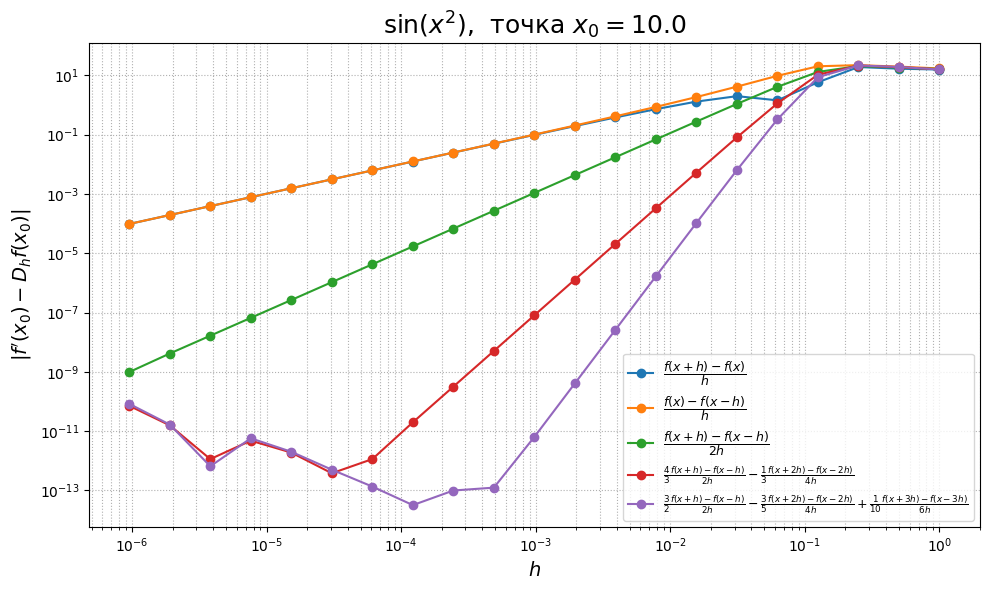

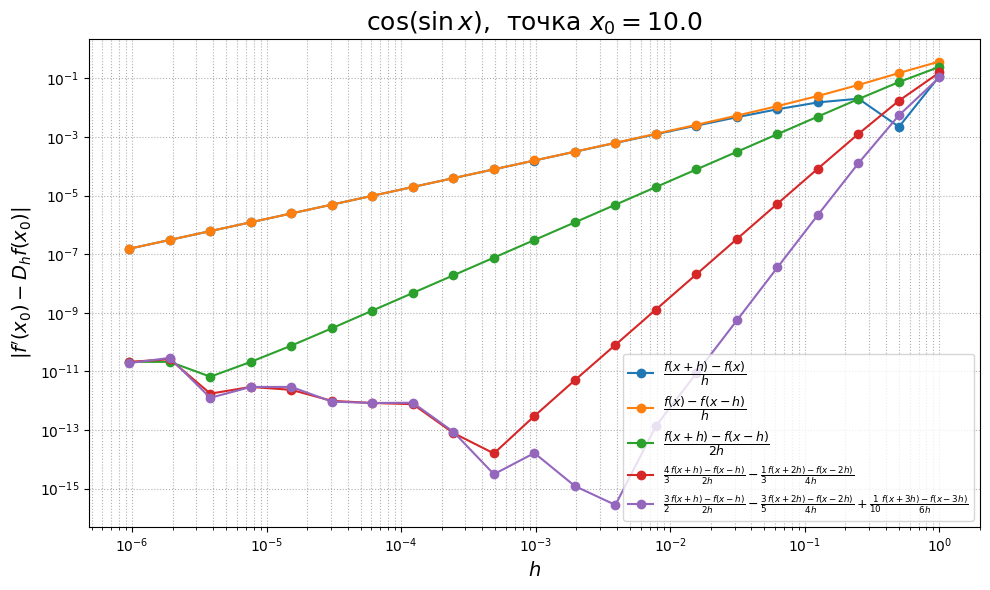

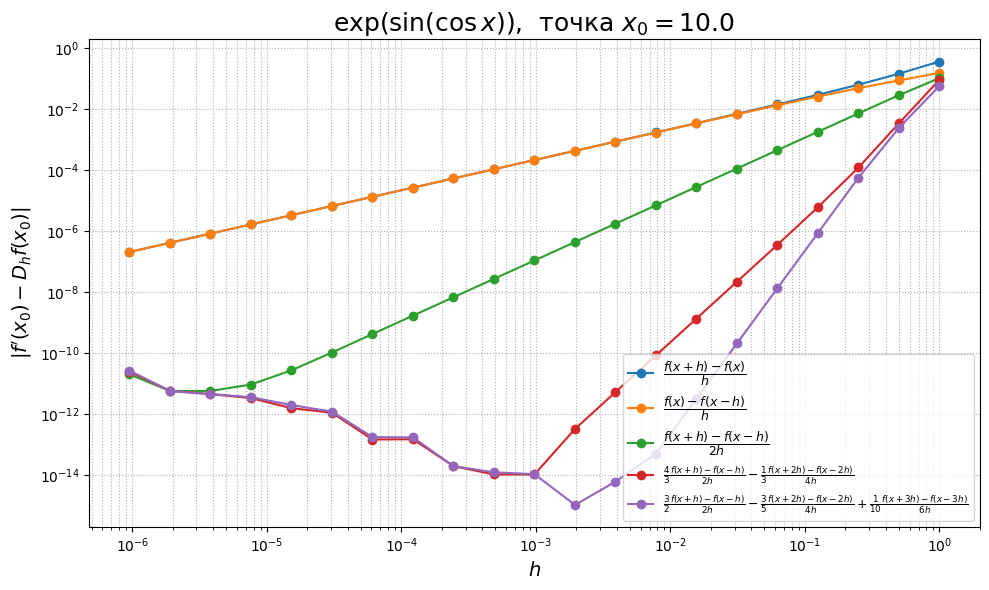

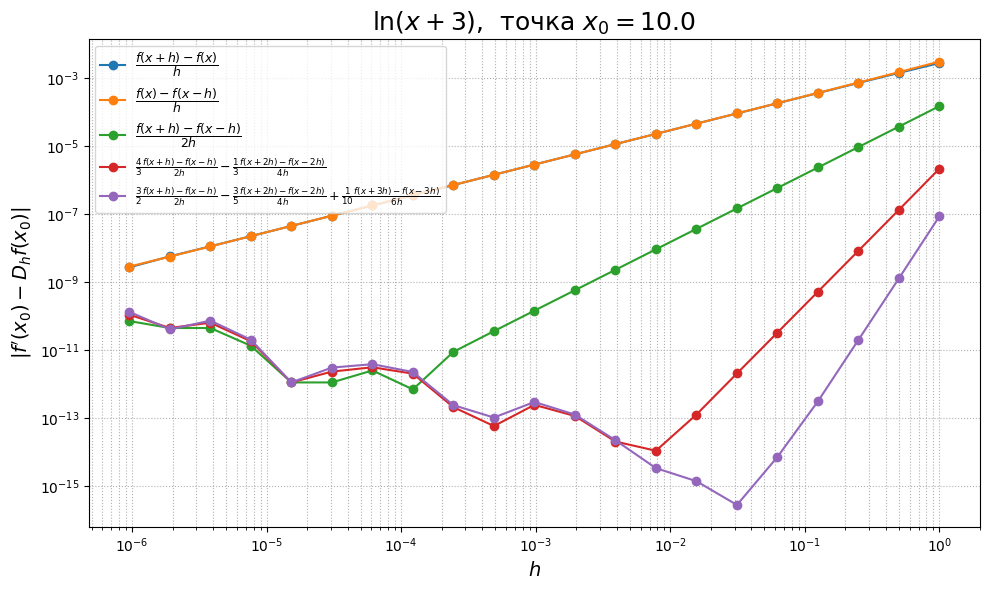

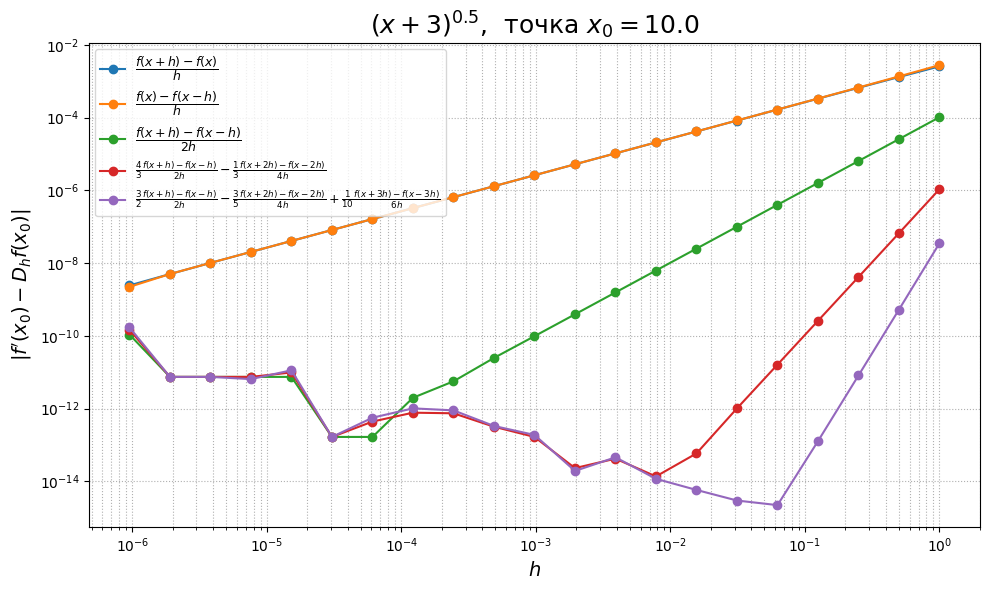

In [7]:
for i, func in enumerate(functions):
    plt.figure(figsize=(10, 6))

    # одна функция — несколько методов на одном графике
    for j, scheme in enumerate(schemes):
        plt.loglog(
            h_values,
            errors[i][j],
            marker="o",
            linestyle="-",
            label=scheme.tex,
        )

    plt.title(f"{func.label},  точка $x_0 = {x0}$", fontsize=18)
    plt.xlabel(r"$h$", fontsize=14)
    plt.ylabel(r"$|f'(x_0) - D_h f(x_0)|$", fontsize=14)

    plt.grid(True, which="both", ls=":")
    plt.legend(fontsize=9)
    plt.tight_layout()
